In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0,10.0)

In [2]:
# Reading Data
df = pd.read_csv('headbrain.csv')

In [3]:
df.shape

(237, 4)

In [4]:
print(df.describe)

<bound method NDFrame.describe of      Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0         1          1             4512                 1530
1         1          1             3738                 1297
2         1          1             4261                 1335
3         1          1             3777                 1282
4         1          1             4177                 1590
..      ...        ...              ...                  ...
232       2          2             3214                 1110
233       2          2             3394                 1215
234       2          2             3233                 1104
235       2          2             3352                 1170
236       2          2             3391                 1120

[237 rows x 4 columns]>


In [5]:
df.head(30)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [6]:
# Collecting X and Y
X = df['Head Size(cm^3)'].values
Y = df['Brain Weight(grams)'].values

In [7]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#Total number of Values
n = len(X)

# Using the Formula to Calculate m and c in y = mx+c
numer = 0
denom = 0
for i in range(n):
    numer = numer + (X[i] - mean_x) * (Y[i] - mean_y)
    denom = denom + (X[i] - mean_x)**2
m = numer / denom 
c = mean_y - (m*mean_x)

#Print Coefficients
print(m,c)
# y = mx + c

0.26342933948939945 325.57342104944223


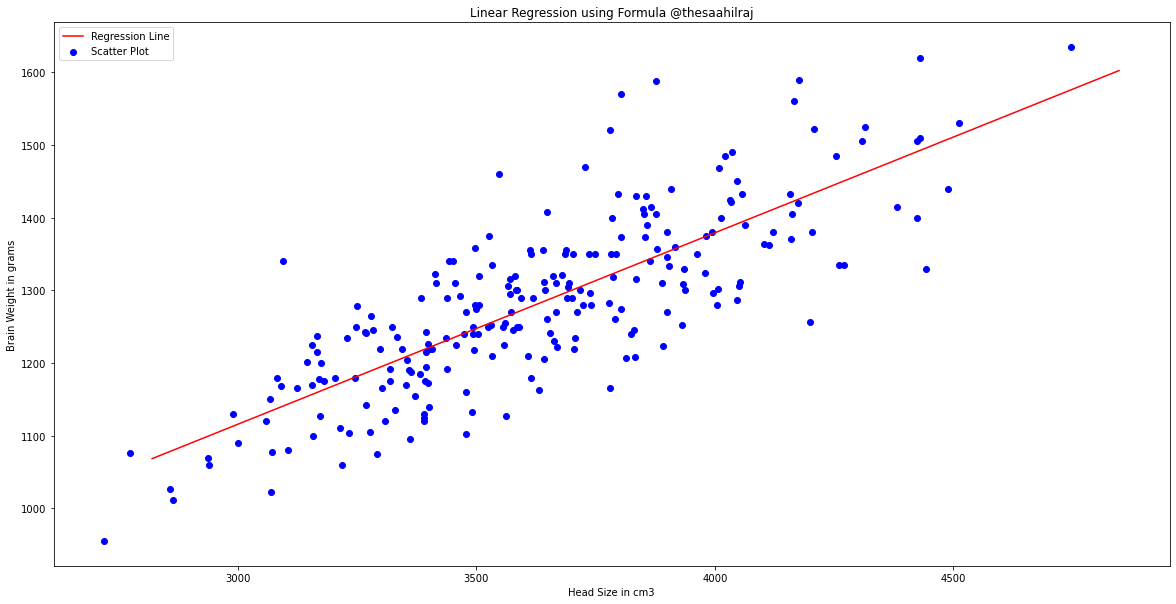

In [8]:
# Plotting Values and Regression Line
max_x = np.max(X) + 100
min_x = np.min(X) + 100

# Calculating line Values X and Y
x = np.linspace(min_x,max_x,1000)
y = (m*x) + c

# PLotting Line
plt.plot(x,y,color='Red',Label = 'Regression Line')

#Plotting Scatter Points
plt.scatter(X,Y,c='Blue',Label = 'Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.title('Linear Regression using Formula @thesaahilraj')
plt.show()

In [9]:
# Using R-Squared Method

ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = (m*X[i]) + c
    ss_t = ss_t + (Y[i]-mean_y)**2
    ss_r = ss_r + (Y[i]-y_pred)**2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


### Using Scikit Library we can Reduce the Code Size and Make the Work Easier

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape((n,1))

# Creating Model
reg = LinearRegression()
reg = reg.fit(X,Y)

# Y Prediction
Y_pred = reg.predict(X)

#Calculating R-Square Score
r2_score = reg.score(X,Y)
print(r2_score)

0.639311719957
